# Hindi MNIST CNN
- Dataset: [kaggle](https://www.kaggle.com/datasets/imbikramsaha/hindi-mnist/data)
- Model: Custom CNN Arch

## Import required libraries

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
%matplotlib inline
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

## Load Data

In [51]:
DATASET_PATH = "../Datasets/Hindi-MNIST/"
os.listdir(DATASET_PATH)

['test', 'train']

In [52]:
transformer = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.ImageFolder(root=DATASET_PATH+"train", transform=transformer)
test_data = datasets.ImageFolder(root=DATASET_PATH+"test", transform=transformer)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, pin_memory=True, num_workers=4)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True, pin_memory=True, num_workers=4)

print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")
print(f"Classes: {train_data.classes}")

Train size: 17000
Test size: 3000
Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Exploratory Data Analysis (EDA)

Class counts: [1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700, 1700]


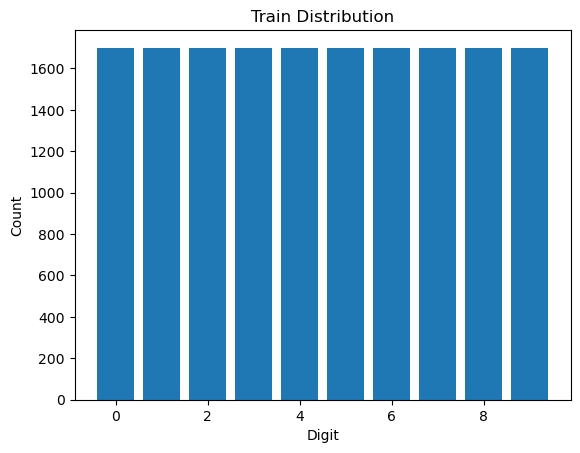

In [12]:
counts = [0]*10
for _, label in train_data:
    counts[label] += 1
print("Class counts:", counts)
plt.bar(range(10), counts)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Train Distribution")
plt.show()

In [49]:
def get_one_sample_per_class(dataset):
    num_classes = len(dataset.classes)
    samples = {}
    for img, lbl in dataset:
        if lbl not in samples:
            samples[lbl] = (img, lbl)
        if len(samples) == num_classes:
            break
    return samples


def show_samples_grid(samples, class_names, cols=10, figsize=(8, 4)):
    fig, axes = plt.subplots(2, 5, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()

    for i, lbl in enumerate(sorted(samples)):
        img, _ = samples[lbl]
        img = img * 0.5 + 0.5  # unnormalize
        axes[i].imshow(img.squeeze(), cmap="gray")
        axes[i].set_title(class_names[lbl])
        # axes[i].axis("off")

    plt.tight_layout()
    plt.show()

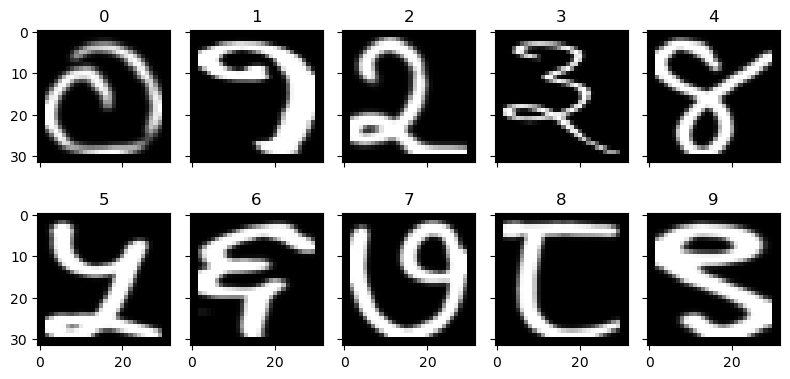

In [53]:
samples = get_one_sample_per_class(train_data)
show_samples_grid(samples, train_data.classes)